In [1]:
# Last amended: 19th March, 2025

## What is a ReAct agent    

A "ReACT agent" (short for Reasoning and Acting) is a framework that empowers Large Language Models (LLMs) to solve complex tasks by combining natural language reasoning with the ability to take actions, such as accessing and using tools. 
Here's a more detailed breakdown: 

>    **Reasoning and Acting:**     
    >>ReACT agents alternate between thinking (reasoning) and acting (executing tasks).     

>    **LLM Enhancement:**     
    >>ReACT enhances LLMs by allowing them to not only understand and process information but also take concrete steps based on their understanding.     

>    **Dynamic and Step-by-Step:**         
>>    ReACT agents employ a dynamic, step-by-step approach, starting with a thought, taking an action, and using the result to refine reasoning and decide on the next action.     

>    **Tool Usage:**     
>>    ReACT agents can utilize various tools to interact with external sources (search engines, databases, knowledge bases, etc.) to gather new information and refine their responses.     

>    **Example:**     
>>    Imagine a ReACT agent tasked with finding the tallest building in Bengaluru. It might first reason about the need to search for information, then use a search tool to find relevant data, and finally, use that data to determine the tallest building.     

The reasoning and action agent, abbreviated as the ReACT agent, is a framework that incorporates the reasoning capabilities of LLMs with the ability to take actionable steps. This means they can not only understand and process information but also take concrete steps based on their understanding. These agents can comprehend and process information, assess situations, take apt actions, communicate responses and track ongoing situations. They are, thus, designed to interact with the real world through actions, such as searching the web, accessing databases, or controlling physical devices while leveraging the language abilities of LLMs for planning, decision-making, and knowledge acquisition. (Ref: See [here](https://www.leewayhertz.com/react-agents-vs-function-calling-agents/))

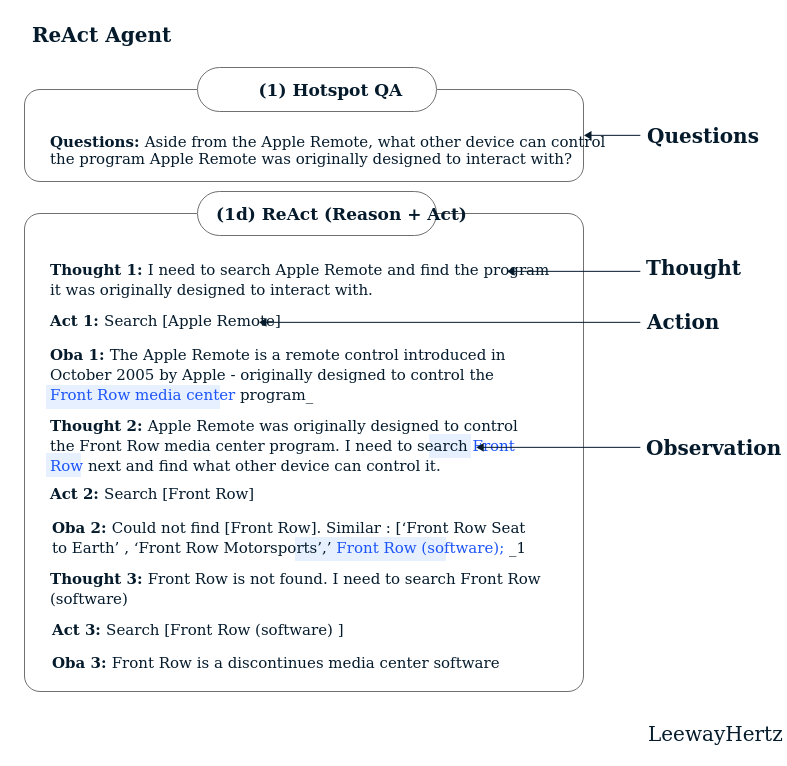

A key aspect of ReACT-based agents lies in how they are prompted. ReACT prompting is a crucial technique that guides the LLM to alternate between reasoning steps and actions. ReACT prompts can effectively teach the model to adopt a ReACT-like behavior by providing examples of how to think and act. For instance, a prompt might include multiple examples of a task, followed by the agent’s thought process, actions taken, and the observed outcomes. This structured approach helps the LLM learn to break down problems, seek information, and take appropriate steps.

## How do ReACT agents work?

Unlike traditional AI systems that separate decision-making from execution, ReACT agents follow a continuous loop of reasoning and action. Here’s how ReACT agents work:

>    Input: An agent receives a task description in natural language, which is fed into the core LLM.

>    Reasoning: The LLM breaks down the task into smaller steps, analyzes the situation, considers available information and plans the actions required to complete it.

>    Action: Based on the reasoning, the LLM decides which tool to use (e.g., search engine, database, API) and executes actions to gather information or interact with the external environment. This might involve querying Wikipedia for relevant facts or retrieving data from a company database.     

>    Observation: The agent observes the results of the actions and updates its knowledge accordingly. The agent also uses this new information to refine its reasoning in the next iteration.


>    Response: The agent generates a final response based on reasoning and the information gathered.     


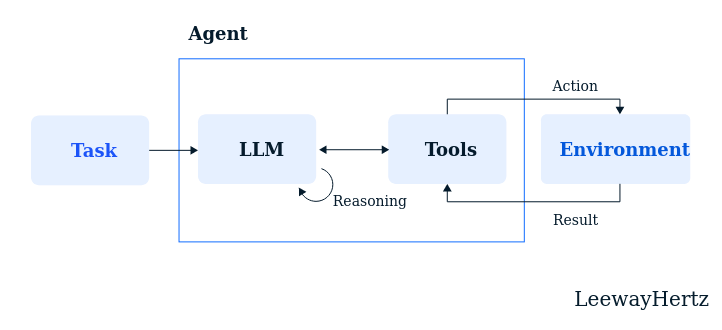

In [ ]:
# Ref: https://docs.llamaindex.ai/en/stable/examples/agent/react_agent/

In [23]:
%reset
from llama_index.llms.ollama import Ollama
from llama_index.core.agent import ReActAgent
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
from llama_index.core.tools import BaseTool, FunctionTool
from llama_index.core.agent import ReActChatFormatter
from llama_index.core.llms import MessageRole

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [24]:
def multiply(a: int, b: int) -> int:
    """Multiply two integers and returns the result integer"""
    return a * b


multiply_tool = FunctionTool.from_defaults(fn=multiply)

In [25]:
def add(a: int, b: int) -> int:
    """Add two integers and returns the result integer"""
    return a + b


In [26]:
add_tool = FunctionTool.from_defaults(fn=add)


In [27]:
llm = Ollama(
                        model="llama3.2:latest",
                        request_timeout=120.0,
                        temperature = 0.0,
                        mirostat = 0)

In [28]:
agent = ReActAgent.from_tools([multiply_tool, add_tool], llm=llm, verbose=True)

If the LLM you use supports function/tool calling, you may set the message role of observations to MessageRole.TOOL.
Doing this will prevent the tool outputs from being misinterpreted as new user messages for some models.

In [29]:
agent = ReActAgent.from_tools(
    [multiply_tool, add_tool],
    llm=llm,
    react_chat_formatter=ReActChatFormatter.from_defaults(
        observation_role=MessageRole.TOOL
    ),
    verbose=True,
)

In [30]:
response = agent.chat("What is 20+(2*4)? Calculate step by step ")


> Running step 9347dcc1-4261-43eb-9fe2-91d27ca6157e. Step input: What is 20+(2*4)? Calculate step by step 
Thought: The current language of the user is: English. I need to use a tool to help me answer the question.
Action: add
Action Input: {'a': 20, 'b': 8}
Observation: 28
> Running step b77a8842-bbdb-496a-8299-4f91e09e262a. Step input: None
Thought: I can answer without using any more tools. I'll use the user's language to answer
Answer: The result of 20+(2*4) is 28.


In [31]:
response_gen = agent.stream_chat("What is 20+2*4? Calculate step by step")
response_gen.print_response_stream()

> Running step 10029cb8-3cd1-479c-bea6-fb36964466d6. Step input: What is 20+2*4? Calculate step by step
Thought: The current language of the user is: English. I need to use a tool to help me answer the question.
Action: add
Action Input: {'a': 20, 'b': 8}
Observation: 28
> Running step 40a86603-fc2d-4efa-b338-131bd60b4d1e. Step input: None
 The result of 20+2*4 is 28.

In [ ]:
##############

In [ ]:
from llama_index.readers.zyte_serp import ZyteSerpReader

reader = ZyteSerpReader(
   api_key="ZYTE_API_KEY",
)
docs = reader.load_data(
    "search query",
)